<a href="https://colab.research.google.com/github/fedhere/DSPS_FBianco/blob/main/HW4/MWrotCurve_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prepared by federica b bianco @fedhere
for UDel DSPS PHYS 467/667

# testing the significance of Dark Matter

In [10]:
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline


#package I will use for constants and units conversion
import astropy
from astropy.constants import G
from astropy import units as u

from IPython.display import Latex



Populating the interactive namespace from numpy and matplotlib


In 1970 Vera Rubin published a seminal paper: she measured the rotational speed of HII regions in several galaxies and how it changed as a function of distance to the center of the galaxy. If we believe Newtonian gravity (or GR) we expect that _once all of the mass is included_, i.e. at a radius distance from the center of the galaxy larger than the radius of the galaxy itself, the rotational speed will be proportional to $v\propto\frac{1}/{r}$

## Propagation of  uncertainties rules

below are the basic rules for propagation of uncertainties - use [this as reference](https://github.com/fedhere/DSPS/blob/master/resources/Managing%20Errors%20and%20Uncertainty.pdf)




$$
\begin{eqnarray}
z = x  \pm y  ~| & ~  &dz = \sqrt{dx^2 + dy^2}
\\
z = x * y  ~| & ~& dz = |xy|  \sqrt{\left(\frac{dx}{x}\right)^2 +
                                \left(\frac{dy}{y}\right)^2} \\
z = x / y  ~| & ~& dz = \left|\frac{x}{y}\right| \sqrt{\left(\frac{dx}{x}\right)^2 +
                                                   \left(\frac{dy}{y}\right)^2} \\
z = x^n ~| & ~& dz = |n| ~ x^{n-1}  dx \\
z = \mathrm{c}x ~| & ~& dz = |\mathrm{c}| ~dx \\
z = f(x, y) ~| & ~& dz = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 dx^2 +\left(\frac{\partial f}{\partial y}\right)^2 dy^2} \\
\end{eqnarray}
$$


# let's assume a Newtonian framework:
the velocity of a body in orbit depends only on the gravitational field of the mass that attracts it, and we can assume that mass is concentrated in the center of mass of (the center for simplicity) the system

with G the gravitational constant, $r$ the radius, and $m(r)$ the mass contained within that radius we have the orbital velocity $v$:



$v^2 = \frac{G \cdot m(r)}{r}$


Derive this $v\propto\frac{1}{r}$ from Newron's law $F~=~\frac{GMm}{r^2}$. Write each formula and describe each step. You can use latex (you really just need to know ```\frac{}``` and ```^```) and this reference
https://www.physicsclassroom.com/calcpad/circgrav

## M31 rotational curve

### data ingestion
( I store the original paper as a link on another computer now I have to find it again :-( - sorry I will updat the reference )

Get the data from the github repository https://github.com/fedhere/DSPS/tree/master/HW4 : there are 2 files: mw.csv and m31.csv. Start with M31, the Andromeda galaxy, Vera Rubin's original target.

Note that the data contains 2 types of uncertainties: one significantly smaller than the other. The ```dv``` uncertainty is the propagation of the uncertainty in the location of the HII line. The uncertainty called ```err``` is the rest of the error budget:  including _all_ other sources of uncertainty. Retain both, you will test your hypothesis with each one to see if it matters which uncertainty you choose

In [2]:
# deleate
m31 = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW4/m31.csv", skiprows=2, names=["r",'v','dv','err'])


In [3]:
m31["err_tot"] = np.sqrt(m31["dv"]**2 + m31["err"]**2)
m31["err_tot"]

In [4]:

m31.head()

,r,v,dv,err,err_tot
0,0.100,183.939,0.000,0.000,0.000000
1,0.120,190.710,10.265,12.191,15.937086
2,0.144,204.141,22.634,21.808,31.430667
3,0.173,207.601,4.573,4.200,6.209052
4,0.207,210.188,3.943,3.258,5.114862


In [5]:
m31.describe()

,r,v,dv,err,err_tot
count,55.000000,55.000000,55.000000,55.000000,55.000000
mean,205.853182,226.079255,55.034818,16.165855,57.781110
std,415.523904,42.799892,49.254792,14.876951,50.970282
min,0.100000,121.974000,0.000000,0.000000,0.000000
25%,1.177000,208.894500,11.945500,3.224000,12.956817
50%,13.737000,229.124000,30.697000,12.065000,32.684957
75%,161.675000,244.102500,99.980000,23.641000,107.040605
max,1887.071000,414.942000,147.835000,54.110000,152.201397


The mean and median of the radius colun `r` are significantly different, indicating a highly asymmetric distribution

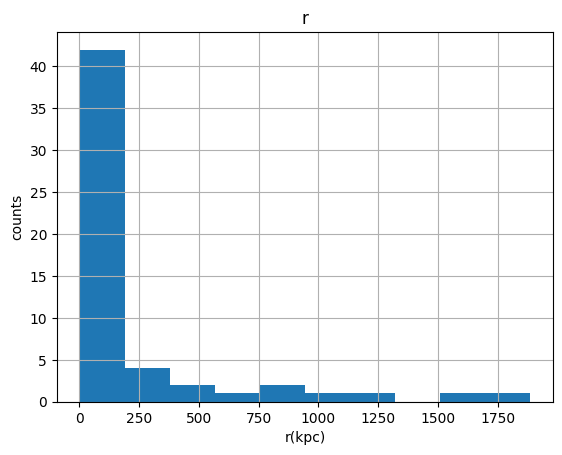

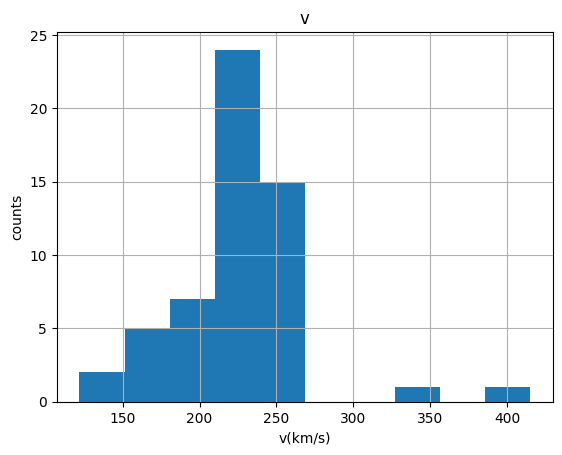

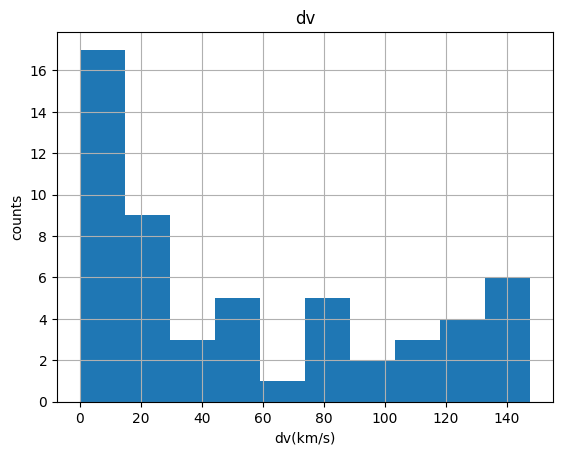

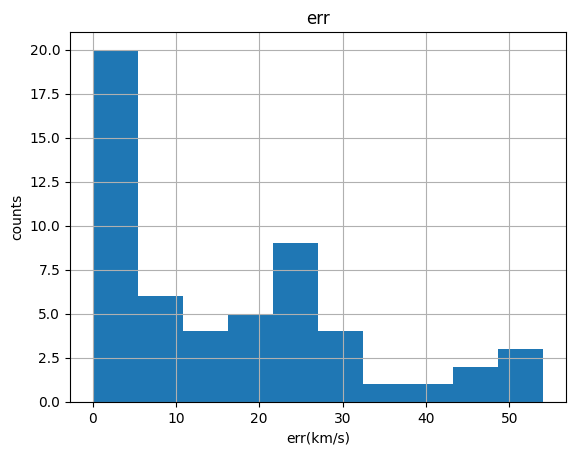

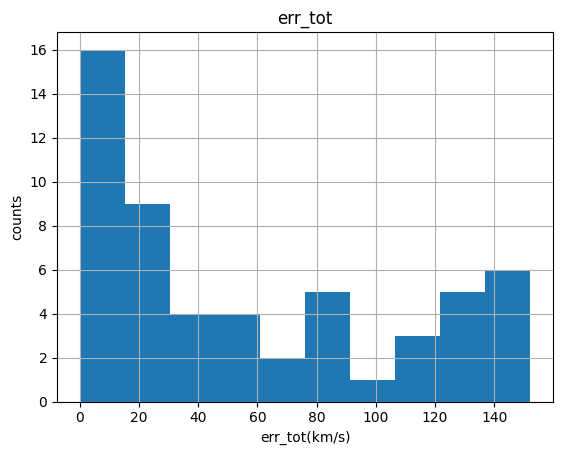

In [7]:
units = {"r":"kpc", "v":"km/s"}
units["dv"] = units["v"]
units["err"] =units["v"]
units["err_tot"] =units["v"]
for c in m31.columns:
  m31[[c]].hist()
  plt.xlabel(c + "(" + units[c] + ")")
  plt.ylabel("counts")
  plt.show()

These distributions are all asymmetric to some degree. the uncertainty distributions are skewed such that the majority of the uncertainty values are small, the velocity distribution is the one that most resambles a bell-shape well behaved distribution, but the high velogy tail is very sparse

from https://en.wikipedia.org/wiki/Andromeda_Galaxy get the extent of the luminous component of M31 (Andromeda). The distance of the Galaxy multiplied by the angular size will give you this information from basic trigonometry (make sure you convert the units properly, using astropy). Make sure you include the uncertainties! uncertainties in the distance will give you the uncertainty in the size

Assume the distance is 778 $\pm$ 33 kpc
   


In [11]:
#delete
apparentSizeM31 = 3.167 / 2 #deg
distanceM31 = (778, 33) # kpc distance and error

In [9]:
m31angS = apparentSizeM31 * u.degree
print("Angular Size of the visible component of Andromeda: {:.2f}".format(m31angS.to(u.rad)  ))

Angular Size of the visible component of Andromeda: 0.03 rad


Please make sure you print a sensible number of decimal digits! you have a  number of significant digits set by the number of digit in the info you get from wikipedia

The distance, from Wikipedia, will have an uncertainty. Convert both to kiloparsecs Kpc

In [14]:
#delete
m31Dist = distanceM31[0] * u.kpc
m31DistErr = distanceM31[1] * u.kpc

In [15]:
#delete
m31Size = m31Dist * m31angS.to(u.rad)
m31SizeError = m31DistErr * m31angS.to(u.rad)
print("Size of the visible component of Andromeda: " +
      r"{:.0f} +/- {:2.1f}".format(m31Size, m31SizeError  ))#, m31SizeError
rerr = 0.9

Size of the visible component of Andromeda: 22 kpc rad +/- 0.9 kpc rad


Print the distance like I printed the angular size.

To get the physical size of the visible component of Andromeda you can use simple trigonometry: $y = r * sin(\alpha) ~ \sim ~ r \alpha $ for small angles


Print the physical size of the Andromeda galaxy (remember decimal digits, proper formatting etc etc).


### find the first measurement  in your data table that includes all the luminous mass.

What is the smallest radius in your data where the luminous mass is completely included and what is the veolcity at that radius?
You can do it by broadcasting (see homework 3)

In [16]:
m31[m31.r > m31Size].r.values[0]

np.float64(23.738)

We expect the velocity to decrease as 1/r if all mass is included: the velocity at a radius twice as far as the radius that includes all the mass should be a factor 2 slower, three times as far a factor 3 slower.

write a function that

1. finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy,

2. takes as arguments:
    - the data and
    - N
    - the size of the luminous component of the galaxy

2. Returns the value of the radius and its uncertainty and the velocity and its uncertainty

In [17]:
#delete
# first measurement including all mass
def getradii(gal, gsize, n):
    i = gal[gal.r > n * gsize].r.index[0]
    # first measurement twice as far
    r = gal.iloc[i:i+1]
    return r

m31Rds = (getradii(m31, m31Size, 1),
          getradii(m31, m31Size, 2),
          getradii(m31, m31Size, 3))
m31Rds

(         r        v      dv   err    err_tot
 30  23.738  236.511  11.729  1.58  11.834942,
          r        v       dv     err     err_tot
 34  49.222  237.069  109.381  23.924  111.966785,
         r        v       dv     err     err_tot
 36  70.88  218.489  132.355  24.657  134.632142)

### data visualization

make a plot that shows

1. the rotational curve of the galaxy (as a line) (e.g. with `df.plot(...)` if your data is stored as a dataframe `df`) showing the uncertainty dv at each quantity (if using `df.plot()` you can use the argument `yerr`)

2. each velocity as an errorbar with error equal to `err_tot` in three different colors of your choice (not black)

3. each velocity as an errorbar with error equal to `dv` in black

4. the datapoint corresponding to N=1, 2, 3 each in a different color.

5. add a legend that indicates the meaning of each color (```pl.legend()```)

6. add a text that indicates the velocity and its uncertainty (dv and err) just below the largest errorbar (```pl.text()``` or ```ax.text()``` if you have an axis object)

7. limit the x axis to the "relevant" portion of the data

/usr/local/lib/python3.12/dist-packages/matplotlib/text.py:762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(x))
/usr/local/lib/python3.12/dist-packages/matplotlib/text.py:763: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(y))
/usr/local/lib/python3.12/dist-packages/matplotlib/text.py:905: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/usr/local/lib/python3.12/dist-packages/matplotlib/text.py:906: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


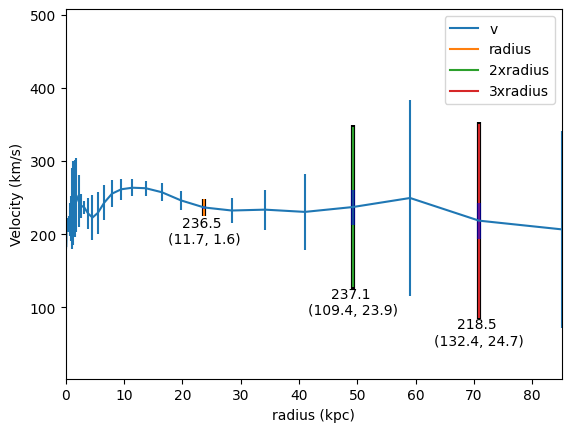

In [39]:
#delete leave plot
def plotGal(gal, rds):
    ax = gal.plot(x='r', y='v', yerr='dv')

    ax = rds[0].plot(x='r', y='v', yerr='err_tot', ax=ax,
                                  lw=3, c="k", legend=False)
    ax = rds[1].plot(x='r', y='v', yerr='err_tot', ax=ax,
                                  lw=3, c="k", legend=False)
    ax = rds[2].plot(x='r', y='v', yerr='err_tot', ax=ax,
                                  lw=3, c="k", legend=False)

    ax = rds[0].plot(x='r', y='v', yerr='dv', ax=ax, label="radius")
    ax = rds[1].plot(x='r', y='v', yerr='dv', ax=ax, label="2xradius")
    ax = rds[2].plot(x='r', y='v', yerr='dv', ax=ax, label="3xradius")

    rds[0].plot(x='r', y='v', yerr='err', ax=ax,
                                  lw=3, c="blue", legend=False, alpha=0.5)
    rds[1].plot(x='r', y='v', yerr='err', ax=ax,
                                  lw=3, c="blue", legend=False, alpha=0.5)
    rds[2].plot(x='r', y='v', yerr='err', ax=ax,
                                  lw=3, c="blue", legend=False, alpha=0.5)

    ax.set_ylabel("Velocity (km/s)")
    ax.set_xlabel("radius (kpc)")

    ax.text(rds[0].r, rds[0].v - rds[0].dv,
            "{:.1f} \n({:.1f}, {:.1f})".format(
                *rds[0][["v", "dv", "err"]].iloc[0]), ha="center", va="top")
    ax.text(rds[1].r, rds[1].v - rds[1].dv,
            "{:.1f} \n({:.1f}, {:.1f})".format(
                *rds[1][["v", "dv", "err"]].iloc[0]), ha="center", va="top")
    ax.text(rds[2].r, rds[2].v - rds[2].dv,
            "{:.1f} \n({:.1f}, {:.1f})".format(
                *rds[2][["v", "dv", "err"]].iloc[0]), ha="center", va="top")
    ax.set_xlim(0, rds[2].r.iloc[0] * 1.2);
plotGal(m31, m31Rds);
#m31, m31Rds

Caption: rotational velocity of M31 as a function of distance from the galaxy center. The uncertainties are shown in black are the total error budget, in color the uncertainty in the location of the spectral line measured, in blue the rest of the errors. The dominant source of uncertainty is the uncertainty in the measurement of the line location

Write a function that for a given dataset and a given luminous radius and a given N (as in N standard deviations)
  
  1) uses the function above `getradii` to find the radius at least as large as needed and the velocity at that radius,
  
  2) states the expected drop in rotational velocities according to Newton's law $v^2\propto 1/r$
  
  3) calculates the ratio of radii and the ratio of velocities at N radii from the center N=1 and N=N (input, e.g. 2, 3 etc) with uncertainties,
  
  4) and stated whether that ratio is consistent within the uncertainties with Newton's law $v^2 \propto 1/r$
  
Your function should print

     - the expected ratio based on the radii,
     - the calculated ratio using ```dv```, and its uncertainty, -
     - the 2-$\sigma$ upper and lower limits of the calculated ratio
     - whether the expected ratio is within the $2-\sigma$ of the calculated ratio,
  5) and the same using ```err_tot```  instead of ```dv```

In [36]:
#delete
def vratios(gal, rds, rd, err='dv', sigmas=3):
    print("\n\nLooking {} radii away from the center using {} as uncertainty".format(rd, err))
    rin, rout = rds[0], rds[rd-1]

    #ratio of v
    vratio = rin["v"].values[0] / rout["v"].values[0]

    #uncertainty in ratio of v
    dv =  vratio * np.sqrt((rin[err].values[0] / rin["v"].values[0])**2 +
        (rout[err].values[0] / rout["v"].values[0])**2)


    dsqrt_r_in = 0.5 / np.sqrt(rin.r.values[0]) * rin[err].values[0]
    dsqrt_r_out = 0.5 / np.sqrt(rout.r.values[0]) * rout[err].values[0]

    expratio = np.sqrt(rout.r.values[0]) / np.sqrt(rin.r.values[0])
    expratio_error = expratio * np.sqrt(
        (dsqrt_r_in **2 / rin.r.values[0]) + (dsqrt_r_out **2 / rout.r.values[0]))

    print("expected ratio of velocities {:.2f} +/- {:.2f}".format(expratio, expratio_error))
    print(r"ratio of velocities {:.2f} +/- {:.2f}".format(vratio, dv))
    ubound = vratio + dv * sigmas
    lbound = vratio - dv * sigmas
    print(r"measurement upper bound ({}-sigma) {:.2f}".format(sigmas, ubound))
    print(r"measurement lower bound ({}-sigma) {:.2f}".format(sigmas, max([0, lbound])))

    print("ratios are the same at {}-sigma significance: {}".format(sigmas,
                                                         (round(ubound, 2) >=
                                           round(expratio)) and
                                                         (round(lbound, 2) <=
                                           round(expratio))))
    #print(vratio + 3*dv, G / kpc2m / r1 / (G / kpc2m / r2))

In [37]:
vratios(m31, m31Rds, 2, sigmas=3)

vratios(m31, m31Rds, 2, sigmas=3, err='err')



Looking 2 radii away from the center using dv as uncertainty
expected ratio of velocities 1.44 +/- 1.64
ratio of velocities 1.00 +/- 0.46
measurement upper bound (3-sigma) 2.39
measurement lower bound (3-sigma) 0.00
ratios are the same at 3-sigma significance: True


Looking 2 radii away from the center using err as uncertainty
expected ratio of velocities 1.44 +/- 0.35
ratio of velocities 1.00 +/- 0.10
measurement upper bound (3-sigma) 1.30
measurement lower bound (3-sigma) 0.69
ratios are the same at 3-sigma significance: True


In [38]:
vratios(m31, m31Rds, 3)
vratios(m31, m31Rds, 3, err='err')



Looking 3 radii away from the center using dv as uncertainty
expected ratio of velocities 1.73 +/- 1.67
ratio of velocities 1.08 +/- 0.66
measurement upper bound (3-sigma) 3.06
measurement lower bound (3-sigma) 0.00
ratios are the same at 3-sigma significance: True


Looking 3 radii away from the center using err as uncertainty
expected ratio of velocities 1.73 +/- 0.31
ratio of velocities 1.08 +/- 0.12
measurement upper bound (3-sigma) 1.45
measurement lower bound (3-sigma) 0.72
ratios are the same at 3-sigma significance: False


Only at 3 radii and when NOT including the uncertainty in th elocation of the spectral lines we find that Newtonian gravity is ruled out at 3 sigma.
Whether we need to rule out Newtonian gravity statistically depends on which uncertainty is used and we are unable to rule it out at 2 radii from the galaxy center altogether (at 3-sigma). While the inconsistency of the predicted and observed velocity is the expected result (we do believe Dark Matter is at play) the large observational uncertainties impair our ability to ascertain the presence of Dark Matter and are forced to, statistically from this dataset, conclude that Newtonian gravity is not rules out (there are many other sources of evidence for Dark Matter tho!)

## do the same for the Milky Way. If your functions were create properly you should be able to reuse them seamlessly

In [25]:
#delete all below

In [26]:
mw = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW4/m31.csv",
                 skiprows=2, names=["r",'v','dv','err'])
mw.head()

,r,v,dv,err
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


In [28]:
mw["err_tot"] = np.sqrt(mw["dv"]**2 + mw["err"]**2)
mw["err_tot"]

,err_tot
0,0.000000
1,15.937086
2,31.430667
3,6.209052
4,5.114862
5,5.288442
6,4.628077
7,2.576122
8,2.528701
9,4.222928


In [29]:
mw.describe()

,r,v,dv,err,err_tot
count,55.000000,55.000000,55.000000,55.000000,55.000000
mean,205.853182,226.079255,55.034818,16.165855,57.781110
std,415.523904,42.799892,49.254792,14.876951,50.970282
min,0.100000,121.974000,0.000000,0.000000,0.000000
25%,1.177000,208.894500,11.945500,3.224000,12.956817
50%,13.737000,229.124000,30.697000,12.065000,32.684957
75%,161.675000,244.102500,99.980000,23.641000,107.040605
max,1887.071000,414.942000,147.835000,54.110000,152.201397


https://en.wikipedia.org/wiki/Milky_Way
    

In [30]:
mwSize =  53.5 * u.kpc
mwSizeError = 2.5 * u.kpc
print(mwSize)#, m31SizeError

53.5 kpc


In [31]:
mwRds = (getradii(mw, mwSize, 1), getradii(mw, mwSize, 2), getradii(mw, mwSize, 3))
mwRds

(         r        v       dv     err     err_tot
 35  59.067  249.443  134.552  26.447  137.126527,
           r        v       dv     err     err_tot
 39  122.481  197.383  105.727  23.358  108.276473,
           r        v      dv     err  err_tot
 41  176.373  165.325  74.652  15.706  76.2863)

/usr/local/lib/python3.12/dist-packages/matplotlib/text.py:762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(x))
/usr/local/lib/python3.12/dist-packages/matplotlib/text.py:763: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(y))
/usr/local/lib/python3.12/dist-packages/matplotlib/text.py:905: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/usr/local/lib/python3.12/dist-packages/matplotlib/text.py:906: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


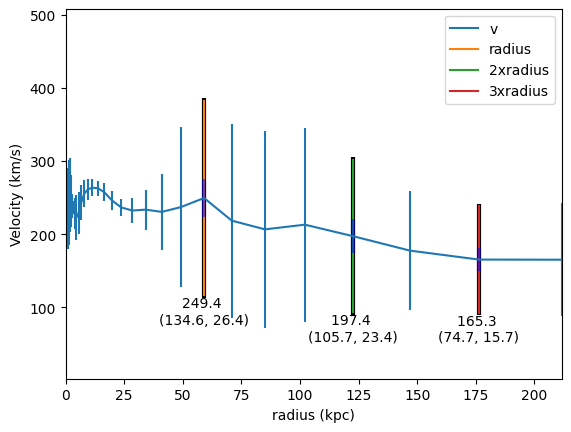

In [40]:
plotGal(mw, mwRds)

In [41]:
vratios(mw, mwRds, 2)
print ()
vratios(mw, mwRds, 3)
print()
vratios(mw, mwRds, 2, "err")
print ()
vratios(mw, mwRds, 3, "err")



Looking 2 radii away from the center using dv as uncertainty
expected ratio of velocities 1.44 +/- 1.75
ratio of velocities 1.26 +/- 0.96
measurement upper bound (3-sigma) 4.15
measurement lower bound (3-sigma) 0.00
ratios are the same at 3-sigma significance: True



Looking 3 radii away from the center using dv as uncertainty
expected ratio of velocities 1.73 +/- 2.00
ratio of velocities 1.51 +/- 1.06
measurement upper bound (3-sigma) 4.69
measurement lower bound (3-sigma) 0.00
ratios are the same at 3-sigma significance: True



Looking 2 radii away from the center using err as uncertainty
expected ratio of velocities 1.44 +/- 0.35
ratio of velocities 1.26 +/- 0.20
measurement upper bound (3-sigma) 1.87
measurement lower bound (3-sigma) 0.66
ratios are the same at 3-sigma significance: True



Looking 3 radii away from the center using err as uncertainty
expected ratio of velocities 1.73 +/- 0.39
ratio of velocities 1.51 +/- 0.21
measurement upper bound (3-sigma) 2.15
measurement 

The students' considerations should include the fact that the measurements are inconsistent with the exected ratio of velocities when only including the uncertainties in velocity, but become consistent when larger uncertainties are taken into consideration, leaving us unable to assess the prsence of dark matter from this method: only when choosing a radius 3 times as far as the luminous radius of the galaxy and the smallest uncertainties, which are likely underestimated the result is significant


